# SciPy

## numpy中的数组

Scipy是在Numpy的基础上增加了众多的数学计算、科学计算以及工程计算常用的模块。例如线性代数、常微分方程的数值求解、信号处理、图像处理等


### 将Python中的数组转化为NumPy中的数组

In [2]:
import numpy as np
list=[1,6,3,5]#定义了一个名为list的Python列表，包含了四个整数 [1, 6, 3, 5]
arr=np.array(list)#np.array()函数将Python列表转换为NumPy数组，并将结果存储在变量arr中
print(type(arr)) #输出arr的类型
print(type(list))#输出list的类
print(arr)#NumPy 数组中的元素在方括号 [] 内用空格分隔，而不是逗号。

<class 'numpy.ndarray'>
<class 'list'>
[1 6 3 5]


### 创建NumPy数组

In [4]:
print(np.zeros(3))#三个元素为０的数组
print(np.ones(3))#三个元素为１的数组
#numpy.arange([start], stop[, step], dtype=None)，start可选默认0，必须，可选默认1，可选，可自动推断
print(np.arange(3))#三个元素为从０开始逐渐增加１的数组　
print(np.arange(3).dtype)#显示numpy数组中元素的数据类型，（在64位系统上）
#numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
print(np.linspace(1., 2., 4)) #创建一个数组，元素范围从1到2，被均匀分为3个
#np.arange() 是基于步长来生成数值，而 np.linspace() 是基于数量来生成数值。

[0. 0. 0.]
[1. 1. 1.]
[0 1 2]
int32
[1.         1.33333333 1.66666667 2.        ]


### 创建NumPy矩阵

In [5]:
mat = np.matrix('1 2; 3 4')# ２＊２的矩阵 
print(mat)
print(mat.T) # 矩阵的转置
print(mat.H) # 矩阵的共轭转置(复数的实部不变，虚部变负)

import numpy.matlib
print(np.matlib.identity(5)) #创建单位矩阵，创建一个 5x5 的单位矩阵，单位矩阵是对角线为1，其余元素为0的矩阵。
print(mat.I) #矩阵的逆矩阵


[[1 2]
 [3 4]]
[[1 3]
 [2 4]]
[[1 3]
 [2 4]]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[[-2.   1. ]
 [ 1.5 -0.5]]


## SciPy中的算法

### 积分 integrate.quad

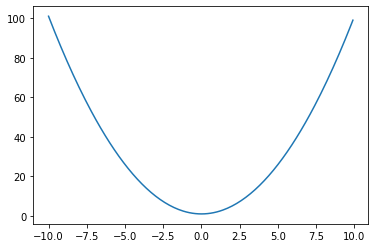

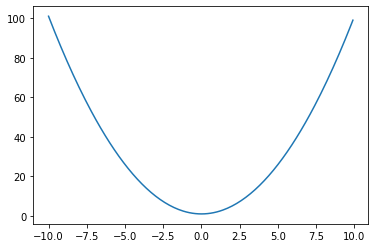

In [6]:
#它定义了一个函数并使用一个 Lambda 表达式来计算该函数的值，然后绘制两个图像
def x2(x):
    return(x**2+1)#定义函数 x2

c=lambda x: x**2+1#Lambda 表达式定义了一个匿名函数 c，lambda 表达式通常用于简单的函数定义，特别是在需要传递函数作为参数时。

import matplotlib.pyplot as plt
#np.arange() 函数在生成数值时是左闭右开的区间。这意味着生成的数组包含起始值，但不包括结束值。
x = np.arange(-10, 10, 0.1)#np.arange() 创建一个从 -10 到 10（不包括 10），步长为 0.1 的数组

# 画出函数曲线
plt.plot(x, x2(x))
plt.show()
plt.plot(x, c(x))
# plt.savefig('./opt2-1.png') # 保存要显示的图片
plt.show()

In [7]:
#展示了如何使用 scipy.integrate 模块中的 quad 函数进行数值积分
import scipy.integrate
f = lambda x, a ,b:a+np.exp(-x**2)*b
#scipy.integrate.quad 用于计算给定函数的定积分。被积函数，积分上下限
#args=(3, 1) 将额外的参数 a=3 和 b=1 传递给 Lambda 函数 f
i = scipy.integrate.quad(f,0,5,args=(3,1))
print(i)# 第一项输出为积分值，第二项为误差

(15.886226925451396, 1.763725490705625e-13)


In [8]:
def f(x, a, b):
    return(a*(x**2)+b)
inte = scipy.integrate.quad(f,0,1, args=(3,1))
print(inte)

(2.0, 2.220446049250313e-14)


### 多重积分 integrate.dblquad()

积分
$$\int_{0}^{0.5}dx \int_{0}^{\sqrt{1-4y^2}} 19xy~dy$$

In [11]:
#scipy.integrate.dblquad 函数来计算一个二重积分
from math import sqrt
f = lambda x, y : 19*x*y
g = lambda x : 0
h = lambda y : sqrt(1-4*y**2)
#x的上下限，y的上下限
i = scipy.integrate.dblquad(f, 0, 0.5, g, h)
print (i)


(0.59375, 2.029716563995638e-14)


### 导数

In [13]:
from scipy.misc import derivative
def x2(x):
    return(x**2)
#derivative(x2,4,1)#第一个参数是被积函数，第二个参数是计算导数的点x=4，dx参数指定了用于计算导数的微小增量，通常使用很小的值
#x2(5)−x2(3)/2
derivative(x2,4)

8.0

### 微分方程

使用scipy中的相关函数 odeint 函数求解。ordinary differential equation integrate

odeint(f,y0,tvals)

f为要求解的函数， y0为初始值， tvals为自变量的范围中的每一个点的值,(初始到结束时的值)

求解一阶导 

$$\frac{dy}{dt}=y(t), \quad y(t_0)=1$$

In [9]:
#scipy.integrate 的 odeint 函数来求解一个简单的常微分方程
import scipy.integrate # 不能只调用 scipy 然后在程序中使用 scipy.integrate
import matplotlib.pyplot as plt
import numpy as np
#(y,t)=y，无论t取什么值，f都只依赖于y，通常用来描述导数
f=lambda y, t:y
#这里调用obdint函数时需要完整使用scipy.integrate 
#第一个参数 f 是微分方程。第二个参数 1 是初始条件 y(0)=1,第三个参数 [0, 0.5, 1] 是求解的时间点
scipy.integrate.odeint(f, 1, [0,0.5,1]) #解为 e 指数.
#解为一个数组，第一个相当于初始值 y(t=0)， 第二个是解 y(t=0.5) ... 


array([[1.        ],
       [1.64872127],
       [2.71828191]])

另一个例子：

$\frac{dy}{dx}=x$ 的解

[[0.        ]
 [0.00510152]
 [0.02040608]
 [0.04591368]
 [0.08162432]]


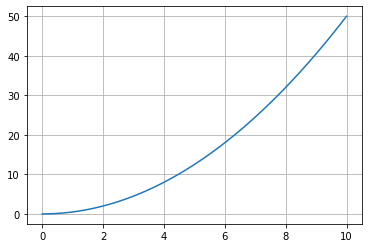

In [15]:
import numpy as np  #numpy 是一个Python库，提供了对数组和矩阵操作的支持。
import matplotlib.pyplot as plt #matplotlib.pyplot 是用于绘制图形的函数集合
from scipy.integrate import odeint  #是一个用于数值积分的函数，用来求解常微分方程组

def diff(y, x):
	return np.array(x)#返回的x是一个数组


	# 上面定义的函数在odeint里面体现的就是dy/dx = x
    
x = np.linspace(0, 10, 100)  # 给出x范围  创建了一个包含 100 个点的数组，范围从 0 到 10
#deint 函数来求解常微分方程。它接受三个参数定义的常微分方程函数,0 是初始条件 y(0) 的值x 是求解的点
y = odeint(diff, 0, x)  # 设初值为0 此时y为一个数组，元素为不同x对应的y值
#odeint(diff, 0, x) 返回一个二维数组 ,y[:, 0] 对应 y1(x),y[:, 1] 对应 y2(x)。

print(y[:5])  # 打印前5行


plt.plot(x, y[:, 0])  # y数组（矩阵）的第一列，（因为维度相同，plt.plot(x, y)效果相同）
plt.grid()
plt.show()  

y的形状： (100, 2)
前5行数据：
 [[0.         1.        ]
 [0.10083841 0.99490282]
 [0.20064884 0.97966323]
 [0.29841379 0.95443659]
 [0.3931366  0.91948007]]


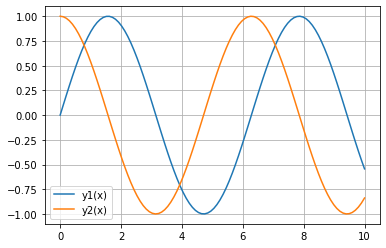

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# 定义微分方程
def diff(y, x):#其中 y 应该是一个数组（或列表），包含至少两个元素
    y1, y2 = y#y 数组的第一个元素解包到 y1，第二个元素解包到 y2
    dy1_dx = y2
    dy2_dx = -y1
    return [dy1_dx, dy2_dx]#函数返回一个列表，包含 𝑦1和 𝑦2 的导数。

# 定义x的范围
x = np.linspace(0, 10, 100)

# y1(0) = 0 和 y2(0) = 1
initial_conditions = [0, 1]

# 使用odeint求解
y = odeint(diff, initial_conditions, x)#每个结果包含 y1(x) 和 y2(x) 两个值。

# 打印y的形状和前几行数据
print("y的形状：", y.shape)#表示 100 个 x 值的结果，每个结果包含 y1(x) 和 y2(x) 两个值
print("前5行数据：\n", y[:5])

# 绘制y1和y2的图像
plt.plot(x, y[:, 0], label='y1(x)')
plt.plot(x, y[:, 1], label='y2(x)')
plt.legend()
plt.grid()
plt.show()


odeint()函数中第一个变量微分方程的函数中可以定义不止一个一阶微分方程,定义多个一阶微分方程就可以解高阶方程，下面是一个解单摆的例子：

$\frac{d^2\theta}{dt^2}=-\frac{g}{l}\theta$

将其转化为两个一阶微分方程

 $\frac{d\omega}{dt}=-\frac{g}{l}\theta$， $\frac{d\theta}{dt}=\omega$

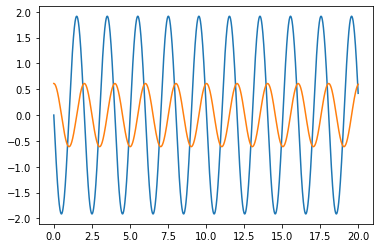

In [11]:
# 求解程序
g = 9.8
l = 1
# 定义一个ode可以使用的二阶微分方程
def diff2(d_list, t):#diff2 函数定义了一个二阶微分方程。d_list 是一个包含两个变量的列表或数组，omega 是角速度，theta 是角度
	omega, theta = d_list
    # 两个返回值， 每一个对应方程右侧的值
	return np.array([-g/l*theta, omega])#返回的数组包含两个元素


t = np.linspace(0, 20, 2000)
# 因为是两阶， 所以初始值也为两个

result = odeint(diff2, [0, 35/180*np.pi], t)#ω(0),θ(0）=35 初始角度为 35 度，换算为弧度
# 结果是一个两列的矩阵， odeint中第二个是初始单摆角度35度
plt.plot(t, result[:, 0])  # 输出omega随时变化曲线
plt.plot(t, result[:, 1])  # 输出theta随时变化曲线，即方程解
plt.show()



时间 (s)	角速度 ω (rad/s)	角度 θ (rad)
0.00		0.0000		0.6109
2.00		0.0365		0.6108
4.00		0.0729		0.6104
6.00		0.1093		0.6099
8.00		0.1457		0.6091
10.01		0.1820		0.6081
12.01		0.2182		0.6069
14.01		0.2544		0.6054
16.01		0.2905		0.6038
18.01		0.3265		0.6019


D:\1.Notepad\anaconda3\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21333 (\N{CJK UNIFIED IDEOGRAPH-5355}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\1.Notepad\anaconda3\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 25670 (\N{CJK UNIFIED IDEOGRAPH-6446}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\1.Notepad\anaconda3\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\1.Notepad\anaconda3\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35282 (\N{CJK UNIFIED IDEOGRAPH-89D2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\1.Notepad\anaconda3\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36895 (\N{CJK UNIFIED IDEOGRAPH-901F}) missing from current fon

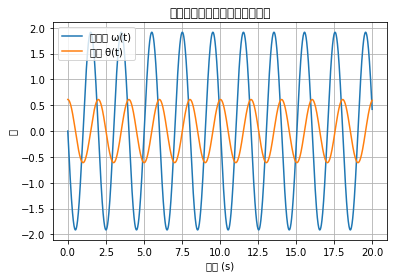

In [16]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# 常量
g = 9.8  # 重力加速度 (m/s^2)
l = 1    # 摆长 (m)

# 定义二阶微分方程
def diff2(d_list, t):
    omega, theta = d_list  # 角速度 omega 和角度 theta
    return np.array([-g/l * theta, omega])  # 返回的方程组

# 时间范围
t = np.linspace(0, 20, 2000)

# 初始条件 (角速度 ω(0) = 0, 角度 θ(0) = 35 度 = 35/180*np.pi 弧度)
initial_conditions = [0, 35/180*np.pi]

# 使用 odeint 求解微分方程
result = odeint(diff2, initial_conditions, t)

# 提取角速度 ω 和角度 θ
omega = result[:, 0]  # 角速度随时间变化
theta = result[:, 1]  # 角度随时间变化

# 输出部分：打印一些解的值
print("时间 (s)\t角速度 ω (rad/s)\t角度 θ (rad)")
for i in range(0, len(t), 200):  # 每隔200个点输出一次
    print(f"{t[i]:.2f}\t\t{omega[i]:.4f}\t\t{theta[i]:.4f}")

# 绘图部分
plt.plot(t, omega, label='角速度 ω(t)')
plt.plot(t, theta, label='角度 θ(t)')
plt.xlabel('时间 (s)')
plt.ylabel('值')
plt.title('单摆的角速度和角度随时间变化')
plt.legend()
plt.grid()
plt.show()


### 插值 interp1d

#### 准备数据

[0.         0.36363636 0.72727273 1.09090909 1.45454545 1.81818182
 2.18181818 2.54545455 2.90909091 3.27272727 3.63636364 4.        ]
[-0.65364362 -0.61966189 -0.51077021 -0.31047698 -0.00715476  0.37976236
  0.76715099  0.99239518  0.85886263  0.27994201 -0.52586509 -0.99582185]


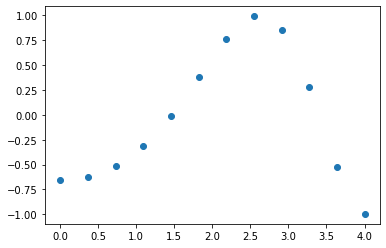

In [17]:
#它使用 NumPy 生成 x 轴上的点，并计算对应的 y 值（基于一个数学函数），然后使用 Matplotlib 绘制这些点
import numpy as np
from scipy import interpolate as intp#模块用于数据插值操作，
import matplotlib.pyplot as plt

x = np.linspace(0, 4, 12)#x 轴上的 12 个等间距点，范围从 0 到 4
y = np.cos(x**2/3 + 4)#公式计算的是余弦函数 cos 的值

print (x)
print (y)
plt.plot(x, y,'o')#用圆点 'o' 绘制 x 和 y 的散点图
plt.show()

#### 构造拟合函数

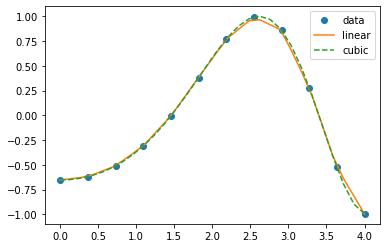

In [18]:
#如何使用 interp1d 进行线性和立方插值，并将结果可视化

f1 = intp.interp1d(x,y, kind = 'linear')#f1 是线性插值函数

f2 = intp.interp1d(x,y, kind = 'cubic')#f2 是立方插值函数。


xnew = np.linspace(0, 4, 30)#生成新的 x 值用于插值：

plt.plot(x, y, 'o', xnew, f1(xnew), '-', xnew, f2(xnew), '--')#绘制原始数据点,'-' 绘制线性插值结果（用实线表示）,绘制立方插值结果（用虚线表示）

plt.legend(['data', 'linear', 'cubic','nearest'], loc = 'best')

plt.show()


### 线性代数

#### 求解线性方程组 linalg

解下面的联立方程组

$x + 3y + 5z = 10$

$2x + 5y +  z =  8$

$2x + 3y + 8z = 3$

In [3]:
# 导入scipy和numpy包
from scipy import linalg #scipy.linalg: 这个模块包含了许多线性代数的函数，用于解线性方程、计算矩阵的逆、特征值等。
import numpy as np

# 声明numpy数组
a = np.array([[1, 3, 5], [2, 5, 1], [2, 3, 8]])#a 是一个3x3的矩阵， 代表线性方程组的系数矩阵
b = np.array([10, 8, 3])#b 是一个包含3个元素的数组，代表方程组的右侧常数向量

# 求解
x = linalg.solve(a, b)#inalg.solve(a, b) 是 scipy.linalg 中的函数，用来求解方程组 𝐴𝑥=𝑏，返回x1,x2,x3的值

# 输出解值
print (x)


[-9.28  5.16  0.76]


#### 计算行列式

In [4]:
# 声明numpy数组
A = np.array([[3,4],[7,8]])

# 计算行列式
x = linalg.det(A)#x = linalg.det(A) 是用来计算矩阵 A 的行列式

# 输出结果
print (x)


-4.0


In [5]:
from scipy import linalg
import numpy as np

# 声明矩阵 A
A = np.array([[1, 3, 5], [2, 5, 1], [2, 3, 8]])

# 计算行列式
x = linalg.det(A)

# 输出行列式值
print(x)


-25.000000000000004


#### 求取特征值与特征向量

In [6]:
# 求解
l, v = linalg.eig(A)#, v = linalg.eig(A) 用于计算矩阵 A 的特征值和特征向量

# 打印特征值
print('特征值')
print (l)

# 打印特征向量
print('特征向量')
print (v)


特征值
[10.5540456 +0.j -0.5873064 +0.j  4.03326081+0.j]
特征向量
[[-0.51686204 -0.94195144  0.11527992]
 [-0.32845853  0.31778071 -0.81936883]
 [-0.79054957  0.10836468  0.56155611]]


#### 奇异值分解
假设A是一个 m*n 的矩阵，　
$
A_{m \times n} = U_{m\times m}\Sigma_{m\times n} V^{T}_{n\times n}$
其中 $\Sigma$是一个对角矩阵，对角线上的值为奇异值，　U和V中的向量是正交的

In [7]:
# 对一个复数矩阵进行奇异值分解

#声明一个复数矩阵 
#np.random.randn(3, 2)生成一个形状为 3×2的服从标准正态分布 (均值为0，标准差为1) 的随机数的函数
a = np.random.randn(3, 2) + 1.j*np.random.randn(3, 2)

# 输出原矩阵
print('原矩阵')
print(a)

# 求解，linalg.svd(a) 计算矩阵 a 的奇异值分解，U 是一个 3×3的矩阵，包含左奇异向量，Vh 是 V 矩阵的共轭转置，它是一个 
#2×2 的矩阵，包含右奇异向量。s 是一个包含奇异值的数组，奇异值按降序排列
U, s, Vh = linalg.svd(a)

# 输出结果
print('奇异值分解')
print(U, "#U")
print(Vh, "#Vh")
print(s, "#s")


原矩阵
[[-2.75187568-0.47071218j -1.09928789+0.05295304j]
 [-1.83104572+0.19438318j  0.5949276 -0.38375126j]
 [-0.38403744-1.37815219j  0.83402732-0.07856448j]]
奇异值分解
[[-0.77689663-0.09471181j -0.27079637+0.50968084j  0.17058392+0.15892509j]
 [-0.47641849+0.02131315j  0.40984312-0.46968735j -0.47486784+0.39811319j]
 [-0.07228829-0.39345504j  0.48841151-0.19942761j  0.7446349 +0.08467123j]] #U
[[ 0.98487903+0.j          0.14330176+0.09735456j]
 [-0.17324348+0.j          0.81466208+0.55345496j]] #Vh
[3.68471065 1.43833733] #s


### 优化 optimize

#### 标量函数极值求解 fmin_bfgs

求函数极小值 
$f(x)=x^2+2x+9$

计算该函数最小值的有效方法之一是使用带起点的BFGS算法。该算法从参数给定的起始点计算函数的梯度下降，并输出梯度为零、二阶导数为正的极小值。

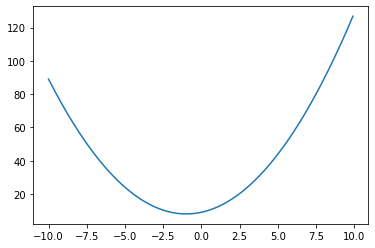

In [9]:
import numpy as np
from scipy import optimize#这个模块可以用于优化函数
import matplotlib.pyplot as plt

# 定义函数
def f(x):
  return x**2 + 2*x + 9

# x取值：-10到10之间，间隔0.1
x = np.arange(-10, 10, 0.1)#生成从 -10 到 10（不包含10）之间的一个数组，步长为 0.1

# 画出函数曲线
plt.plot(x, f(x))
# plt.savefig('./opt2-1.png') # 保存要显示的图片
plt.show()


Optimization terminated successfully.
         Current function value: 8.000000
         Iterations: 2
         Function evaluations: 6
         Gradient evaluations: 3
xmin:  -1.00000000944232
ymin:  8.0


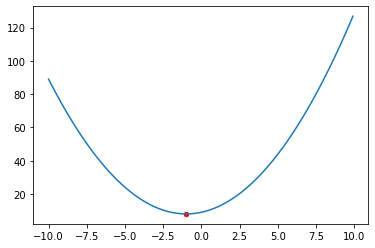

In [11]:
#使用 scipy.optimize 模块中的 fmin_bfgs 函数来找到一个给定函数的局部最小值，并将结果绘制在函数曲线图上

# 第一个参数是函数名，第二个参数是梯度下降的起点。xopt 返回的是一个包含最小值点的数组
xopt = optimize.fmin_bfgs(f, 0)
#fmin_bfgs 是一个局部优化方法，因此找到的最小值可能是局部最小值而非全局最小值。选择合适的初始猜测点 x0 可以帮助找到更好的局部最小值。

xmin = xopt[0] # 从 xopt 数组中提取最小值点的 x 坐标
ymin = f(xmin) # 计算出函数在 xmin 点的值，即函数的最小值
print('xmin: ', xmin)
print('ymin: ', ymin)

# 画出函数曲线
plt.plot(x, f(x))
# 画出最小值的点, s=20设置点的大小，c='r'设置点的颜色
plt.scatter(xmin, ymin, s=20, c='r')

#plt.savefig('./opt3-1.png') # 保存要显示的图片
plt.show()



当函数有局部最小值，该算法会因起始点不同，找到这些局部最小而不是全局最小。

Optimization terminated successfully.
         Current function value: -17.757257
         Iterations: 6
         Function evaluations: 14
         Gradient evaluations: 7
xmin:  -1.4275517833333036
ymin:  -17.757256531474148


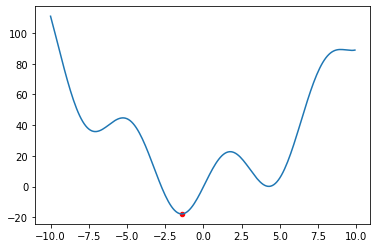

In [11]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# 定义函数
def g(x):
  return x**2 + 20*np.sin(x)

# x取值：-10到10之间，间隔0.1
x = np.arange(-10, 10, 0.1)

# 画出函数曲线
plt.plot(x, g(x))

# 第一个参数是函数名，第二个参数是梯度下降的起点。返回值是函数最小值的x值(ndarray数组)
# 可以看到5.0附近有个局部最小，把初始值设置为7, 返回的应该是这个局部最小值。
xopt = optimize.fmin_bfgs(g, 0)

xmin = xopt[0] # x值
ymin = g(xmin) # y值，即函数最小值
print('xmin: ', xmin)
print('ymin: ', ymin)

# 画出最小值的点, s=20设置点的大小，c='r'设置点的颜色
plt.scatter(xmin, ymin, s=20, c='r')

#plt.savefig('./opt5-1.png') # 保存要显示的图片
plt.show()


In [ ]:
此时改变初始值，则返回不同初始值处的最小值

#### 一定范围的最小值　fminbound

要求取一定范围之内的函数最小值，可使用fminbound方法

In [18]:
import numpy as np
from scipy import optimize
#fminbound 是 scipy.optimize 模块中的一个函数，用于在一维情况下寻找函数的最小值。
# 定义函数
def g(x):
  return x**2 + 20*np.sin(x)

# 求取-10到-5之间的函数最小值。full_output=True表示返回详细信息。
ret = optimize.fminbound(g, -10, -5, full_output=True)

#当 full_output=True 时，fminbound 返回一个包含以下内容：在给定区间内使目标函数最小化的 x 值。在最小值点处的目标函数值
#一个整数，表示优化算法的退出状态。0 表示成功，其他值表示失败或收敛问题。一个字符串，包含有关优化过程的详细信息（如收敛情况）
#优化过程中目标函数被调用的次数。
print(ret)


(-7.068891380019064, 35.82273589215205, 0, 12)


### 解方程　fsolve

#### 解一元方程

In [12]:
import numpy as np
from scipy import optimize

# 定义函数
def g(x):
  return x**2 + 20*np.sin(x)
#scipy.optimize.fsolve 函数来找到给定函数的根。fsolve 用于求解非线性方程或方程组的根
# optimize.fsolve 用于找到使目标函数 g(x) 的值为零的 x 值，第一个参数是目标函数 g，第二个参数是初始猜测值 2，fsolve 从这个猜测点开始搜索根。
ret = optimize.fsolve(g, 2)

print(ret)


[0.]


#### 解方程组

$4x + 9 =0$

$3y^{2}-\sin(yz)=0$

$yz-2.5=0$

In [20]:
from scipy.optimize import fsolve
from math import sin,cos
#使用 scipy.optimize.fsolve 函数来解决一个非线性方程组
#f(x)：这是一个函数，表示方程组。它接受一个包含三个元素的列表，并返回一个列表，
def f(x):
    x0 = float(x[0])
    x1 = float(x[1])
    x2 = float(x[2])
    return [
        4*x0+ 9,
        3*x1*x1 - sin(x1*x2),
        x1*x2 - 2.5
    ]
result = fsolve(f, [1,1,1])#第一个参数是方程组函数 f，第二个参数是初始猜测值 [1, 1, 1]
print (result)


[-2.25        0.44664383  5.59730104]


### 函数拟合 curve_fit


求出的系数a, b: 
[49.62227178  2.60625935]

variables_covariance: 
[[0.46348599 0.08661113]
 [0.08661113 0.21735976]]


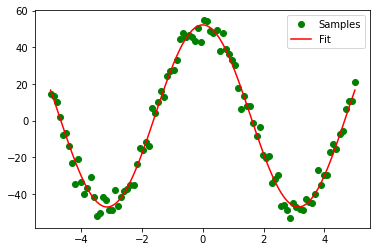

In [21]:
#使用 scipy.optimize.curve_fit 来拟合一组含噪声的数据，并绘制拟合结果
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# 定义函数模型，函数模型用于生成数据
def g(x, a, b):
   return a*np.cos(x) + b

# 产生含噪声的样本数据
x_data = np.linspace(-5, 5, 100) # 采样点
y_data = g(x_data, 50, 2) + 5*np.random.randn(x_data.size) # 加入随机数作为噪声
#使用函数 g(x_data, 50, 2) 生成理论数据，其中 a=50 和 b=2。然后在这些数据中加入了噪声
#生成了一个与 x_data 数据点数量相同的随机数数组，这些随机数服从标准正态分布。

# 使用curve_fit()函数来估计a和b的值
variables, variables_covariance = optimize.curve_fit(g, x_data, y_data)
#optimize.curve_fit：用于最小化拟合函数与数据之间的误差，找到最佳的参数 a 和 b
#第一个参数是模型函数 g。第二个参数是自变量数据 x_data，第三个参数是观测数据 y_data。
#ariables：拟合得到的最佳参数 a 和 b，variables_covariance：参数的协方差矩阵，提供了参数估计的精度信息。
# 输出结果

print('\n求出的系数a, b: ')
print(variables)

print('\nvariables_covariance: ')
print(variables_covariance)


y = g(x_data, variables[0], variables[1])

plt.plot(x_data, y_data, 'o', color="green", label = "Samples")
plt.plot(x_data, y, color="red", label = "Fit")
plt.legend(loc = "best")#lt.legend(loc="best")：显示图例，位置自动选择最优位置。

#plt.savefig('./opt10-1.png') # 保存要显示的图片
plt.show()

### 最小二乘法

k =  0.4211697393502931 b =  -8.288302606523974


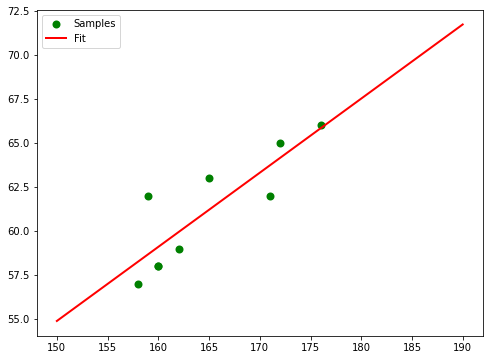

In [22]:
#使用最小二乘法拟合一个线性模型，并将结果可视化。具体来说，它通过最小化直线与数据点之间的残差平方和来确定最佳的直线拟合


# 样本数据，自变量与因变量
X = np.array([160,165,158,172,159,176,160,162,171])
Y = np.array([58,63,57,65,62,66,58,59,62])

# 偏差函数
def residuals(p):#算模型预测值与实际数据之间的误差
        k, b = p  #p 是包含两个参数的列表 [k, b]，分别代表直线的斜率和截距。
        return Y-(k*X+b)#函数返回每个数据点的残差，

# 使用最小二乘法拟合直线
#最小化 residuals 函数的平方和，寻找最佳参数 [k, b]。偏差函数 residuals，参数的初始值 [1, 10]
ret = optimize.leastsq(residuals, [1, 10])#最小化残差平方和 (Least Squares)
k, b = ret[0]#最优的参数估计值
print("k = ", k, "b = ", b)

#画样本点
plt.figure(figsize=(8, 6)) ##指定图像比例： 8：6
plt.scatter(X, Y, color="green", label="Samples", linewidth=2)

#画拟合直线
x = np.linspace(150, 190, 100) ##在150-190直接画100个连续点
y = k*x + b ##函数式
plt.plot(x,y,color="red", label="Fit",linewidth=2)
plt.legend() #绘制图例
plt.savefig('./opt11-1.png') # 保存要显示的图片
plt.show()


## 统计

### 概率密度分布

应导入scipy.stats 包进行统计分析。

In [2]:
import scipy.stats as st

以正态分布为例了解scipy.stats的基本使用方法。

 - 1.生成服从指定分布的随机数 norm.rvs

norm.rvs通过loc和scale参数可以指定正态分布的期望和标准差。size得到随机数数组的形状参数。
生成的是np.array形式的数组。

In [23]:
#生成符合正态分布（高斯分布）的随机样本
import scipy.stats as st
st.norm.rvs(loc = 0,scale = 0.1,size =10)#分布的均值，分布的标准差，生成的随机样本的数量

array([-0.08460513, -0.0017238 , -0.19530826, -0.06427721,  0.00382108,
        0.00422395,  0.04252543, -0.06031181,  0.15933014, -0.04108928])

In [25]:
st.norm.rvs(loc = 0,scale = 0.1,size =(2,2))#生成样本的形状。这里设置为 (2, 2)，意味着生成一个 2x2 的数组，每个元素都符合给定的正态分布。

array([[-0.2073763 , -0.30120929],
       [ 0.01057805, -0.03601567]])

- stats.norm.pdf 正态分布概率密度函数

- stats.norm.cdf 正态分布累计概率密度函数

In [26]:
st.norm.pdf(0,loc = 0,scale = 1)#计算标准正态分布（均值为 0，标准差为 1）在点 𝑥=0 处的概率密度。

0.3989422804014327

In [30]:
st.norm.cdf(0,loc=3,scale=1)#计算在均值为 3 和标准差为 1 的正态分布中，随机变量小于或等于 0 的概率。

0.0013498980316300933

D:\1.Notepad\anaconda3\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


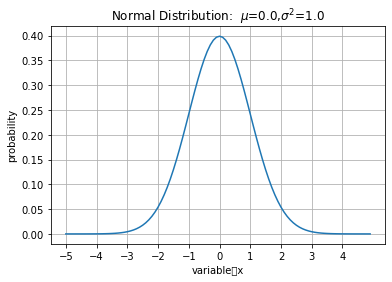

In [31]:
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

# 生成对一组符合正态分布的数据

#第1步：定义随机变量：
mu=0 #平均值
sigma=1 #标准差
X=np.arange(-5,5,0.1)

#第2步：概率密度函数（PDF）
y=st.norm.pdf(X,mu,sigma)#连续分布用pdf,离散分布用pmf
#y=st.norm.cdf(X,mu,sigma)

#第3步：绘图
plt.plot(X,y)
plt.xticks(np.arange(-5, 5, 1))#plt.xticks()：这个函数用于设置 x 轴的刻度位置和标签。

#x轴文本
plt.xlabel('variable：x')
#y轴文本
plt.ylabel('probability')
#标题
plt.title('Normal Distribution:  $\mu$=%.1f,$\sigma^2$=%.1f'%(mu,sigma))
#网格
plt.grid()
#显示图形
plt.show()

t 分布与正态分布用法类似，但需要一个额外参数 df

比较t-分布与标准正态分布


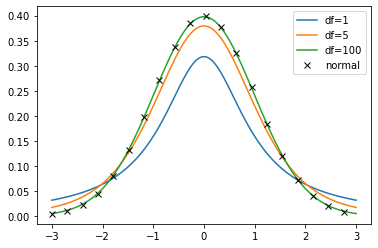

In [32]:
# 用于比较 t-分布和标准正态分布，并将结果可视化。
import numpy as np
import matplotlib.pyplot as plt

print('比较t-分布与标准正态分布')
x = np.linspace( -3, 3, 100)#生成从 -3 到 3 的 100 个等间隔的数据点。
#st.t.pdf(x, df) 计算给定 x 值在 df 自由度下的 t-分布的概率密度函数
plt.plot(x, st.t.pdf(x,1), label='df=1')
plt.plot(x, st.t.pdf(x,5), label='df=5')
plt.plot(x, st.t.pdf(x,100), label = 'df=100')
#st.norm.pdf(x) 计算给定 x 值在标准正态分布（均值为 0，标准差为 1）下的概率密度函数
#'kx' 用于将正态分布的点标记为黑色十字（'x'）。
#[::5]：这是一个切片操作，第一个冒号 : 表示从数组的开头开始。第二个冒号 : 表示到数组的末尾结束，5 是步长，表示每隔 5 个元素取一个
plt.plot( x[::5], st.norm.pdf(x[::5]),'kx', label='normal') # 这里正态分布取默认 \mu=0 和 \sigma=1 
plt.legend()
plt.show()

### 统计部分附录

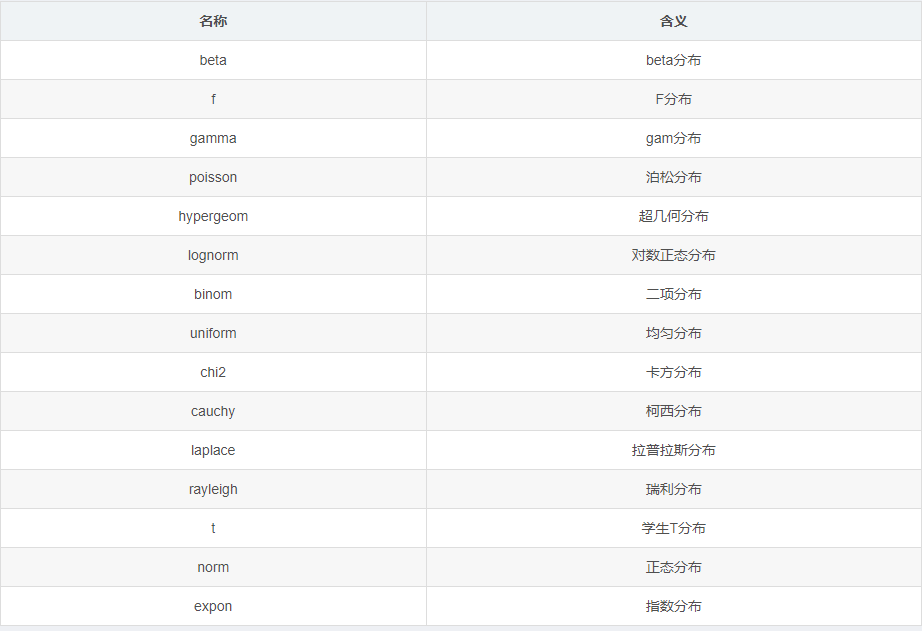

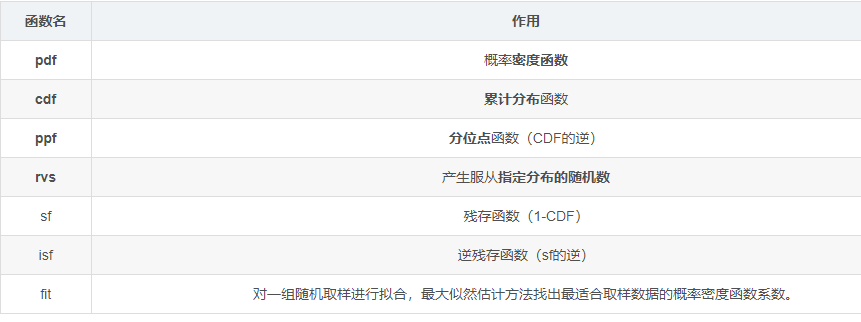